In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from flask import Flask,render_template,request
import joblib
from keras.models import load_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
print(tf.__version__)
#NLP Libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Bidirectional

#Vocabulary Size
vocab_size=10000
app = Flask(__name__)
@app.route('/')
def home():
	return render_template('/content/drive/MyDrive/NLP_web/templates/home.html')
@app.route('/predict',methods=['POST'])
def predict():
  nltk.download('stopwords')
  nltk.download('wordnet')
  from nltk.stem import WordNetLemmatizer
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words("english"))
# STEMMING, REMOVAL OF STOP WORDS , CONVERTING INTO LOWER CASE
  lemmatizer = WordNetLemmatizer()
  nltk.download('vader_lexicon')
  sid = SentimentIntensityAnalyzer()
  svm_model = joblib.load('/content/drive/MyDrive/Project_7th_Sem/model/SVM_CEASE.pkl')

  lstm_model = load_model('/content/drive/MyDrive/Project_7th_Sem/model/LSTM_CEASE.h5')
  if request.method == 'POST':
    message = request.form['message']
    data = [message]
    words = data.split()

# Lemmatize each word

    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
# Join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    encoded_text = one_hot(lemmatized_sentence, 3000)  # Adjust vocabulary size as per your requirements
    padded_text = pad_sequences([encoded_text], maxlen=20)  # Adjust maxlen as per your requirements
    sentiment_scores = [sid.polarity_scores(str(data))["compound"]]
    lstm_prediction = lstm_model.predict(padded_text)
#combined_features = sentiment_scores + lstm_prediction
    combined_features = np.column_stack((lstm_prediction[:len(sentiment_scores)], sentiment_scores))
#sentiment_scores = np.array(sentiment_scores)
    svm_prediction = svm_model.predict(combined_features)[0]
    return render_template('/content/drive/MyDrive/NLP_web/templates/result.html', prediction=svm_prediction)
if __name__ == '__main__':
  app.run(debug=True)

2.12.0
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Simple UI

In [12]:
import nltk
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
import joblib
from keras.models import load_model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
svm_model = joblib.load('/content/drive/MyDrive/Project_7th_Sem/model/SVM_CEASE.pkl')
lstm_model = load_model('/content/drive/MyDrive/Project_7th_Sem/model/LSTM_CEASE.h5')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [163]:
text = input("Enter text: ")

Enter text: i am so happy for you 


In [164]:
words = text.split()

# Lemmatize each word

lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]
# Join the lemmatized words back into a sentence
lemmatized_sentence = ' '.join(lemmatized_words)
print(lemmatized_sentence)


happy


In [165]:
encoded_text = one_hot(lemmatized_sentence, 3000)  # Adjust vocabulary size as per your requirements
padded_text = pad_sequences([encoded_text], maxlen=20)  # Adjust maxlen as per your requirements
sentiment_scores = [sid.polarity_scores(str(text))["compound"]]
print(encoded_text)
print(padded_text)
print(sentiment_scores)

[1708]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0 1708]]
[0.6115]


In [166]:
results = []
lstm_prediction = lstm_model.predict(padded_text)
#combined_features = sentiment_scores + lstm_prediction
combined_features = np.column_stack((lstm_prediction[:len(sentiment_scores)], sentiment_scores))
#sentiment_scores = np.array(sentiment_scores)
svm_prediction = svm_model.predict(combined_features)[0]
results.append([text, svm_prediction, sentiment_scores])

1/1 [==============================] - 0s 58ms/step


In [167]:
result_df = pd.DataFrame(results, columns=['Text', 'Class', 'Sentiment'])
print(result_df)

                     Text  Class Sentiment
0  i am so happy for you       0  [0.6115]


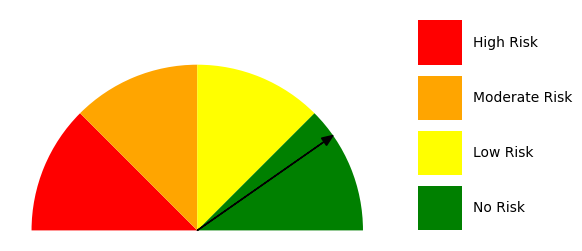

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

def get_color(value):
    if -1 <= value <= -0.76:
        return 'red'
    elif -0.75 <= value <= -0.51:
        return 'orange'
    elif -0.50 <= value <= -0.26:
        return 'yellow'
    elif -0.25 <= value <= 0:
        return 'green'
    else:
        return 'gray'

def plot_half_circle_meter_with_boxes(value):
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.set_aspect('equal')
    ax.set_axis_off()

    # Define the colors for the four parts
    colors = ['red', 'orange', 'yellow', 'green']
    labels = ['High Risk', 'Moderate Risk', 'Low Risk', 'No Risk']

    # Define the angles for the four parts
    angles = [180, 135, 90, 45, 0]

    # Plot the four colored regions and add labels
    for i in range(len(angles) - 1):
        angle_range = angles[i] - angles[i + 1]
        wedge = Wedge(center=(0.5, 0), r=0.75, theta1=angles[i + 1], theta2=angles[i], facecolor=colors[i])
        ax.add_patch(wedge)
        #ax.text(0.8, 0.75 - i * 0.25, labels[i], ha='left', va='center', fontsize=10)

    # Calculate the angle to position the indicator based on the value
    normalized_value = max(-1, min(1, value))
    angle = np.interp(normalized_value, [-1, 1], [angles[0], angles[-1]])

    # Plot the indicator arrow
    ax.arrow(0.5, 0.0, 0.7 * np.cos(np.radians(angle)), 0.7 * np.sin(np.radians(angle)),
             head_width=0.04, head_length=0.05, fc='black', ec='black')

    # Draw the colored boxes and add labels
    for i in range(len(colors)):
        ax.add_patch(plt.Rectangle((1.5, 0.75 - i * 0.25), 0.2, 0.2, fc=colors[i]))
        ax.text(1.75, 0.85 - i * 0.25, labels[i], ha='left', va='center', fontsize=10)

    plt.show()

# Example usage:
#value = 0.35  # Replace this with your desired value in the range -1 to 1
#plot_half_circle_meter_with_boxes(sentiment_scores)
for value in sentiment_scores:
    plot_half_circle_meter_with_boxes(value)